In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/Admin/Downloads/Housing.csv')

In [2]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no':0}))

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


Ckecking skweness

In [5]:
df['price'].skew()

1.2122388370279802

In [6]:
df['area'].skew()

1.321188343153483

We can see the the price and area are highly skewed, we should perform log transform.

In [7]:
import numpy as np
df['log_price'] = np.log1p(df['price'])
df.drop('price', axis=1, inplace=True)
df['log_area'] = np.log1p(df['area'])

In [8]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,log_area
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,16.403275,8.912069
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,16.321037,9.100637
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,16.321037,9.206433
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,16.318175,8.922792
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,16.250001,8.912069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,14.414348,8.006701
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,14.384879,7.783641
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,14.375127,8.194506
543,2910,3,1,1,0,0,0,0,0,0,0,furnished,14.375127,7.976252


Feature Creation (Build new features that model can't infer)

In [9]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

df['area_per_room'] = df['area'] / df['total_rooms']
df['log_area_per_room'] = df['log_area'] / df['total_rooms']

df['rooms_to_story_ratio'] = df['total_rooms'] / df['stories']

df['fully_featured'] = ((df['basement'] == 1) &
                       (df['mainroad'] == 1) &
                       (df['guestroom'] == 1) &
                       (df['airconditioning'] == 1)).astype(int)

df['no_parking'] = (df['parking'] == 0).astype(int)

df = pd.get_dummies(df, columns=['furnishingstatus'], dtype=int)
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,log_area,total_rooms,area_per_room,log_area_per_room,rooms_to_story_ratio,fully_featured,no_parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,...,8.912069,6,1236.666667,1.485345,2.0,0,0,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,...,9.100637,8,1120.000000,1.137580,2.0,0,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,...,9.206433,5,1992.000000,1.841287,2.5,0,0,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,...,8.922792,6,1250.000000,1.487132,3.0,0,0,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,...,8.912069,5,1484.000000,1.782414,2.5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,...,8.006701,3,1000.000000,2.668900,3.0,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,...,7.783641,4,600.000000,1.945910,4.0,0,1,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,...,8.194506,3,1206.666667,2.731502,3.0,0,1,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,...,7.976252,4,727.500000,1.994063,4.0,0,1,1,0,0


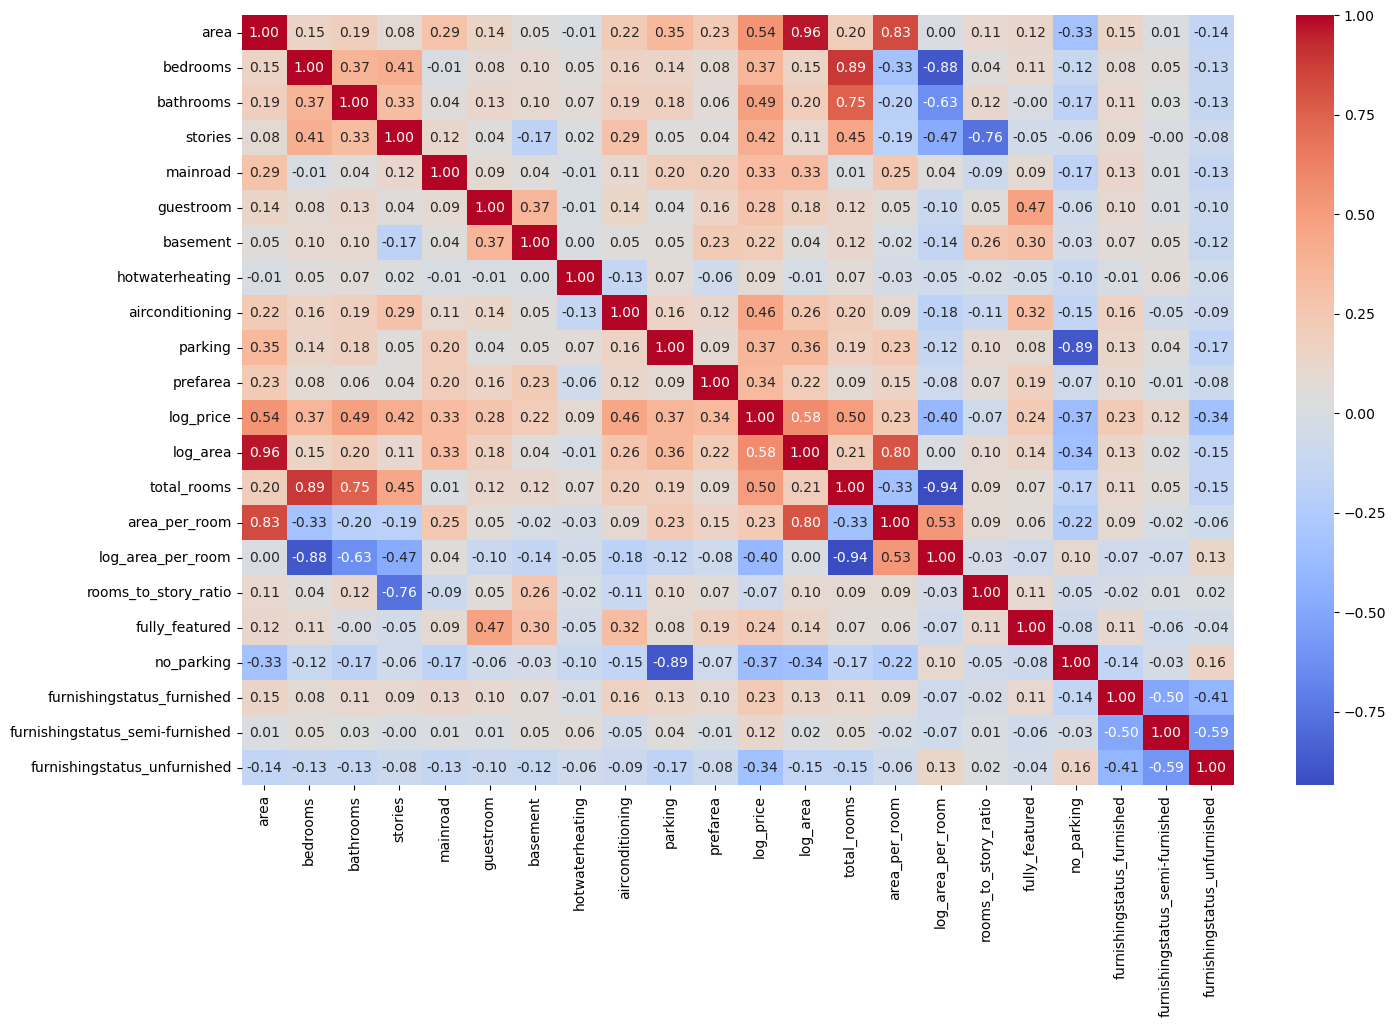

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Now it gives a better sense of house size than bedrooms alone

In [11]:
df['fully_featured'].value_counts()

fully_featured
0    520
1     25
Name: count, dtype: int64

In [16]:
df.groupby('fully_featured')['log_price'].mean()

fully_featured
0    15.287797
1    15.706148
Name: log_price, dtype: float64

Checking for Multicollinearity

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
independent_variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'log_area', 'total_rooms', 'area_per_room',
       'log_area_per_room', 'rooms_to_story_ratio', 'fully_featured',
       'no_parking', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
while True:
    x = df[independent_variables]
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > 10:
        print('VIF:', vif)
        print(f'Dropping {independent_variables[maxloc]} in index: {maxloc}')
        del independent_variables[maxloc]
    else:
        break
print('\nFinal variables', independent_variables)

VIF: [33.902443829803275, inf, inf, 8.680087263041122, 1.2312188755810778, 1.5047500600953911, 1.3821399537189143, 1.0537390247027958, 1.4083838463601108, 5.0702080949641255, 1.1857318331184987, 17.072544393855274, inf, 26.455882230908767, 20.431772343228353, 6.475220826479027, 1.5475056475937707, 4.949549847133222, 1583.3858629463036, 2576.619254848777, 2018.9122815032106]
Dropping bedrooms in index: 1
VIF: [33.9024438298034, 2.8674716755721303, 8.680087263041122, 1.2312188755810776, 1.5047500600953911, 1.3821399537189143, 1.0537390247027958, 1.4083838463601106, 5.0702080949641255, 1.1857318331184987, 17.072544393855274, 18.739266546409787, 26.455882230908767, 20.4317723432284, 6.475220826479031, 1.5475056475937707, 4.949549847133222, 1583.3858629463036, 2576.619254848777, 2018.9122815032106]
Dropping furnishingstatus_semi-furnished in index: 18
VIF: [157.51010872474814, 21.385294078361863, 46.31609447034306, 8.454913745490694, 1.7903712306549258, 2.1060415400737416, 1.104233600877391